<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content!</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="##Library-and-Data" role="tab" aria-controls="profile">Library and Data<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Word-Cloud" role="tab" aria-controls="messages">Word Cloud<span class="badge badge-primary badge-pill"></span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Split-Text" role="tab" aria-controls="messages">Split Text<span class="badge badge-primary badge-pill"></span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Lower-Case" role="tab" aria-controls="settings">Lower Case<span class="badge badge-primary badge-pill"></span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#Upper-Case" role="tab" aria-controls="settings">Upper-Case<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Unique-Words" role="tab" aria-controls="settings">Unique Words<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Remove-Punctuations" role="tab" aria-controls="settings">Remove Punctuations<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Removing-Number" role="tab" aria-controls="settings"> Removing Number<span class="badge badge-primary badge-pill"></span></a>  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Removing-Urls" role="tab" aria-controls="settings">Removing Urls<span class="badge badge-primary badge-pill"></span></a>  
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Removing-HTML-tags" role="tab" aria-controls="settings">Removing HTML Tags<span class="badge badge-primary badge-pill"></span></a>
     <a class="list-group-item list-group-item-action" data-toggle="list" href="#Remove-Emoji" role="tab" aria-controls="settings">Remove Emoji<span class="badge badge-primary badge-pill"></span></a>
     <a class="list-group-item list-group-item-action" data-toggle="list" href="#Remove-Stop-Words" role="tab" aria-controls="settings">Remove Stop Words<span class="badge badge-primary badge-pill"></span></a>
     <a class="list-group-item list-group-item-action" data-toggle="list" href="#Stemming" role="tab" aria-controls="settings">Stemming<span class="badge badge-primary badge-pill"></span></a>
     <a class="list-group-item list-group-item-action" data-toggle="list" href="#Lemmatization" role="tab" aria-controls="settings">Lemmatization<span class="badge badge-primary badge-pill"></span></a>
     <a class="list-group-item list-group-item-action" data-toggle="list" href="#Tokenization" role="tab" aria-controls="settings">Tokenization<span class="badge badge-primary badge-pill"></span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#Vectorization" role="tab" aria-controls="settings">Vectorization<span class="badge badge-primary badge-pill"></span></a>
     <a class="list-group-item list-group-item-action" data-toggle="list" href="#Parse-Tree" role="tab" aria-controls="settings">Parse Tree<span class="badge badge-primary badge-pill"></span></a>
      

# Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import nltk
import nltk as nlp
import string
import re
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding
data = pd.read_csv('../input/nlp-getting-started/train.csv', encoding='utf-8')


In [2]:
data = pd.read_csv('../input/nlp-getting-started/train.csv', encoding='utf-8')
true = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
news = pd.read_csv("../input/cbc-news-coronavirus-articles-march-26/news.csv")


# Word Cloud

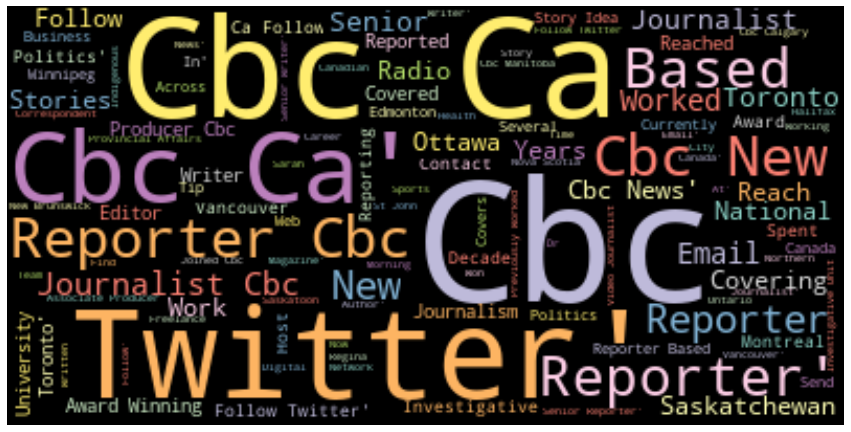

In [3]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in news.authors.unique())
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

# Split Text 

In [4]:
def split(text):
    for word in text:
        text = text.split()
        return text
split("I am going")

['I', 'am', 'going']

In [5]:
data['split_text'] = data['text'].apply(lambda x: split(x))
data.head(1)

,id,keyword,location,text,target,split_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart..."


# Lower Case

In [6]:
text= "universe going to expanded infinite"
lowercase_text = [word.lower() for word in text.split()]
print(lowercase_text)

['universe', 'going', 'to', 'expanded', 'infinite']


# Upper Case

In [7]:
uppercase_text = [word.upper() for word in text.split()]
print(uppercase_text)

['UNIVERSE', 'GOING', 'TO', 'EXPANDED', 'INFINITE']


# Unique Words

In [8]:
def unique(text):
    for word in text:
        text = text.split()
        text = set(text)
        return text
unique("i am going and i will go by bus")

{'am', 'and', 'bus', 'by', 'go', 'going', 'i', 'will'}

In [9]:
true['title_unq'] = true['title'].apply(lambda x: unique(x))
true.head(1)

,title,text,subject,date,title_unq
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","{fiscal, Republicans, script, fight, U.S., loo..."


# Remove Punctuations

In [10]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
remove_punct("wow!!!")

'wow'

In [11]:
news['nopunc'] = news['title'].apply(lambda x: remove_punct(x))
news.head(1)

,Unnamed: 0,authors,title,publish_date,description,text,url,nopunc
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,Coronavirus a wakeup call for Canadas prescrip...


# Remove Numbers

In [12]:
def remove_numbers(text):
    text = ''.join([i for i in text if not i.isdigit()])         
    return text
remove_numbers("I am 20 years")

'I am  years'

# Removing Urls


In [13]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL("Kaggle id https://www.kaggle.com/vanshjatana")

'Kaggle id '

# Removing HTML tags


In [14]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
remove_html("<h1>Vansh Jatana</h1>")

'Vansh Jatana'

# Remove Emoji

In [15]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Sad😔")

'Sad'

# Remove Stop Words

In [16]:
stopwords = set(nltk.corpus.stopwords.words())
def clean_stopwords(text):
    res = []
    for word in text:
        if word not in stopwords:
            res.append(word)
    return res
clean_stopwords("I am coming")

['I', ' ', ' ', 'g']

# Stemming

In [17]:
text = text.lower().split(" ")

porter_stemmer = nlp.PorterStemmer()
roots = [porter_stemmer.stem(each) for each in text]
print(roots)

['univers', 'go', 'to', 'expand', 'infinit']


# Lemmatization

In [18]:
lemma = nlp.WordNetLemmatizer()
lemma_roots = [lemma.lemmatize(each) for each in text]
print(lemma_roots)

['universe', 'going', 'to', 'expanded', 'infinite']


# Tokenization

In [19]:
def tokenization(text):
    text = re.split('\W+', text)
    return text
tokenization("I'm coming, where he's??")

['I', 'm', 'coming', 'where', 'he', 's', '']

# Vectorization

In [20]:
count = feature_extraction.text.CountVectorizer()
train_vectors = count.fit_transform(data["text"][0:2])
print(train_vectors[0].todense())
print(train_vectors[1].todense())


[[1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1]]
[[0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0]]


# Parse Tree

In [21]:
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py


--2020-05-02 11:36:02--  https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6863 (6.7K) [text/plain]
Saving to: ‘explacy.py’

explacy.py          100%[===================>]   6.70K  --.-KB/s    in 0s      

2020-05-02 11:36:02 (50.0 MB/s) - ‘explacy.py’ saved [6863/6863]



In [22]:
import explacy
spacy_tok = spacy.load('en_core_web_sm')

explacy.print_parse_info(spacy_tok, 'Data is new oil')


Dep tree Token Dep type Lemma Part of Sp
──────── ───── ──────── ───── ──────────
   ┌─►   Data  nsubj    Data  PROPN     
┌──┴──   is    ROOT     be    AUX       
│  ┌─►   new   amod     new   ADJ       
└─►└──   oil   attr     oil   NOUN      
